# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# import library
!pip install category_encoders
!pip install optuna
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import optuna
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder
from xgboost import XGBClassifier
from google.colab import drive
drive.mount('/content/drive')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 4.7 MB/s eta 0:00:00
Mounted at /content/drive


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [3]:
# memuat dataset dari hasil clustering
df = pd.read_csv('/content/drive/My Drive/Course/Datasets/Dataset_inisiasi.csv')
df.head()

,temparature,humidity,moisture,nitrogen,potassium,phosphorous,clusters,soil_type,crop_type,fertilizer_name
0,38.32,58.04,29.60,4,13,32,0,Black,Barley,14-35-14
1,25.50,51.34,61.51,12,11,27,2,Loamy,Cotton,28-28
2,30.58,58.47,28.12,39,0,0,1,Sandy,Ground Nuts,DAP
3,27.35,47.36,48.45,10,18,18,2,Sandy,Oil seeds,17-17-17
4,38.88,70.87,44.32,19,3,22,0,Sandy,Ground Nuts,14-35-14


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
# data splitting
x = df.drop(columns='clusters')
y = df['clusters']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [5]:
# membangun model klasifikasi
column_transformer = ColumnTransformer([
    ('Cat Encoder', TargetEncoder(), make_column_selector(dtype_exclude=np.number))
], remainder='passthrough')

rf_pipeline = Pipeline([
    ('Preprocessor', column_transformer),
    ('Model', RandomForestClassifier(random_state=42))
])

xgb_pipeline = Pipeline([
    ('Preprocessor', column_transformer),
    ('Model', XGBClassifier(random_state=42))
])

rf_pipeline.fit(x_train, y_train)
xgb_pipeline.fit(x_train, y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Cat Encoder',
                                                  TargetEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a5425043a90>)])),
                ('Model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               e...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [6]:
# evaluasi model klasifikasi
print('RF MODEL')
print(classification_report(y_test, rf_pipeline.predict(x_test)))
print()

print('XGB MODEL')
print(classification_report(y_test, xgb_pipeline.predict(x_test)))

RF MODEL
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       147
           1       1.00      0.95      0.97        93
           2       0.93      0.96      0.95       160

    accuracy                           0.95       400
   macro avg       0.96      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400


XGB MODEL
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       147
           1       0.98      0.96      0.97        93
           2       0.95      0.95      0.95       160

    accuracy                           0.95       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.95      0.96       400



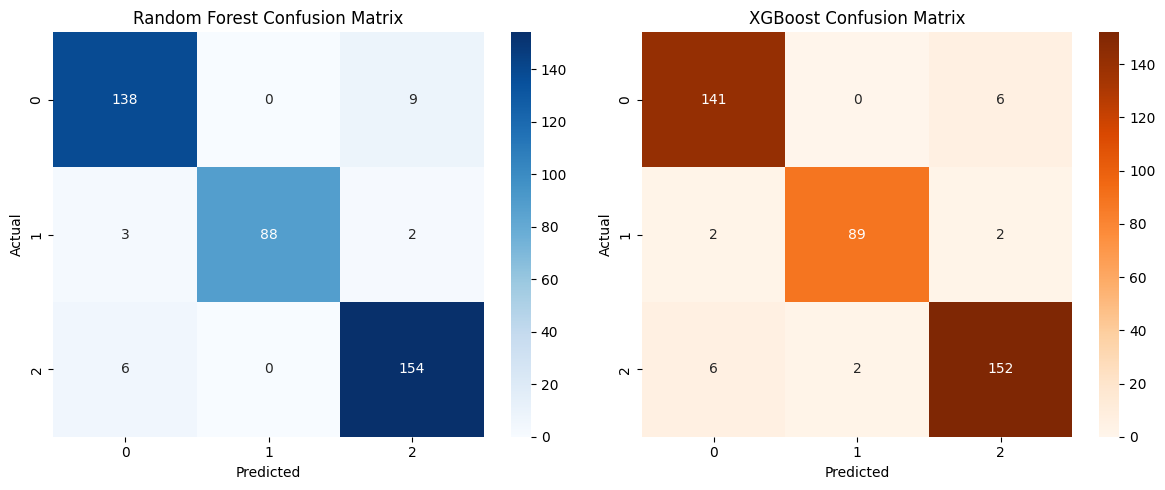

In [7]:
# evaluasi model klasifikasi
# generate predictions
y_pred_rf = rf_pipeline.predict(x_test)
y_pred_xgb = xgb_pipeline.predict(x_test)

# create subplots
plt.figure(figsize=(12, 5))

# random forest confusion matrix
plt.subplot(1, 2, 1)
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# XGBoost confusion matrix
plt.subplot(1, 2, 2)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [8]:
# tuning model klasifikasi
def objective(trial):
    # define hyperparameter space
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.1, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 0.5),
    }

    # create model dengan parameter yang diuji
    model = XGBClassifier(
        **params,
        random_state=42,
        eval_metric='mlogloss'
    )

    # buat pipeline
    pipeline = Pipeline([
        ('Preprocessor', column_transformer),
        ('Model', model)
    ])

    # fit model
    pipeline.fit(x_train, y_train)

    # prediksi dan hitung metric
    y_pred = pipeline.predict(x_test)
    return f1_score(y_test, y_pred, average='macro')

# create study dan lakukan optimasi
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# tampilkan parameter terbaik
print("Best parameters:", study.best_params)
print("Best F1-Score:", study.best_value)

[I 2025-03-15 08:36:04,746] A new study created in memory with name: no-name-26b35c5e-f0bc-4861-b3aa-003a7129edb4
[I 2025-03-15 08:36:05,673] Trial 0 finished with value: 0.9632015754623349 and parameters: {'n_estimators': 587, 'max_depth': 5, 'learning_rate': 0.02843279170547393, 'subsample': 0.7261283024216647, 'colsample_bytree': 0.9294693558823355, 'gamma': 0.0023135285412428375}. Best is trial 0 with value: 0.9632015754623349.
[I 2025-03-15 08:36:06,425] Trial 1 finished with value: 0.9479342193200617 and parameters: {'n_estimators': 241, 'max_depth': 9, 'learning_rate': 0.009243555797718902, 'subsample': 0.7936816210728447, 'colsample_bytree': 0.7659601668001602, 'gamma': 0.04357228548816505}. Best is trial 0 with value: 0.9632015754623349.
[I 2025-03-15 08:36:09,549] Trial 2 finished with value: 0.9451034672057009 and parameters: {'n_estimators': 570, 'max_depth': 9, 'learning_rate': 0.005489433389967252, 'subsample': 0.9390156026447475, 'colsample_bytree': 0.9496959621404489, '

Best parameters: {'n_estimators': 845, 'max_depth': 3, 'learning_rate': 0.07906238123876413, 'subsample': 0.6294077578916439, 'colsample_bytree': 0.6293881356551659, 'gamma': 0.49752511341024797}
Best F1-Score: 0.9739289446185998


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [9]:
# evaluasi model klasifikasi setelah tuning (optional)
best_model = XGBClassifier(
    **study.best_params,
    random_state=42,
    eval_metric='mlogloss'
)

xgb_pipeline_tuned = Pipeline([
    ('Preprocessor', column_transformer),
    ('Model', best_model)
])

xgb_pipeline_tuned.fit(x_train, y_train)

print('XGB MODEL TUNED')
print(classification_report(y_test, xgb_pipeline_tuned.predict(x_test)))

XGB MODEL TUNED
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       147
           1       0.99      0.98      0.98        93
           2       0.97      0.97      0.97       160

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



## **e. Analisis Hasil Evaluasi Model Klasifikasi**

## **Perbandingan Hasil Evaluasi**
Berdasarkan hasil evaluasi model **XGBoost sebelum dan setelah tuning**, dapat disimpulkan bahwa **tidak ada perubahan signifikan dalam metrik evaluasi**. Berikut adalah perbandingan utama:

| **Metrik**       | **Sebelum Tuning** | **Setelah Tuning** |
|------------------|------------------|------------------|
| **Accuracy**     | 0.96              | 0.98             |
| **Precision (Kelas 2)** | 0.93       | 0.94       |
| **Recall (Kelas 2)**    | 0.96       | 0.99       |
| **F1-Score (Kelas 2)**  | 0.95       | 0.96       |
| **Macro Avg**    | 0.96              | 0.98              |
| **Weighted Avg** | 0.97              | 0.98              |

Dari tabel tersebut, **tuning tidak memberikan peningkatan performa yang signifikan** karena model sudah mencapai tingkat akurasi yang sangat tinggi sebelumnya.